# In this file a machine learning model has been trained

In [34]:
import joblib
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Activation, MaxPooling2D, Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2



## Loading preprocessed images and labels

In [35]:
with open('images_array.joblib', 'rb') as f:
    X = joblib.load(f)

In [36]:
with open('images_labels.joblib', 'rb') as f:
    y = joblib.load(f)

## Normalizing the preprocessed images

In [37]:
def normalized():

        norm=np.zeros((120,100,100,3),np.float32)
        norm_rgb=np.zeros((120,100,100,3),np.uint8)

        b=X[:,:,:,0]
        g=X[:,:,:,1]
        r=X[:,:,:,2]

        sum=b+g+r

        norm[:,:,:,0] = b / (sum*255.0)
        norm[:,:,:,1] = g / (sum*255.0)
        norm[:,:,:,2] = r / (sum*255.0)

        norm_rgb=cv2.convertScaleAbs(norm)
        return norm_rgb

In [38]:
x = normalized()

<ipython-input-37-eb612169273b>:12: RuntimeWarning: divide by zero encountered in true_divide
  norm[:,:,:,0] = b / (sum*255.0)
<ipython-input-37-eb612169273b>:12: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,:,0] = b / (sum*255.0)
<ipython-input-37-eb612169273b>:13: RuntimeWarning: divide by zero encountered in true_divide
  norm[:,:,:,1] = g / (sum*255.0)
<ipython-input-37-eb612169273b>:13: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,:,1] = g / (sum*255.0)
<ipython-input-37-eb612169273b>:14: RuntimeWarning: divide by zero encountered in true_divide
  norm[:,:,:,2] = r / (sum*255.0)
<ipython-input-37-eb612169273b>:14: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,:,2] = r / (sum*255.0)


In [39]:
x = np.array(x)
y = np.array(y)

## Building an CNN model 

In [40]:
model = Sequential()

In [41]:
model.add(Conv2D(32, (2,2), input_shape = x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(3))
model.add(Activation('softmax'))


In [42]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
history = model.fit(x, y, batch_size = 32, epochs = 25, validation_split = 0.2)

Epoch 1/25
3/3 [==============================] - 1s 193ms/step - loss: 1.1016 - accuracy: 0.2292 - val_loss: 1.0966 - val_accuracy: 0.3333
Epoch 2/25
3/3 [==============================] - 0s 119ms/step - loss: 1.0916 - accuracy: 0.4375 - val_loss: 1.0945 - val_accuracy: 0.3333
Epoch 3/25
3/3 [==============================] - 0s 117ms/step - loss: 1.0890 - accuracy: 0.3646 - val_loss: 1.0927 - val_accuracy: 0.4583
Epoch 4/25
3/3 [==============================] - 0s 115ms/step - loss: 1.0761 - accuracy: 0.4375 - val_loss: 1.0910 - val_accuracy: 0.4583
Epoch 5/25
3/3 [==============================] - 0s 123ms/step - loss: 1.0697 - accuracy: 0.4479 - val_loss: 1.0876 - val_accuracy: 0.4167
Epoch 6/25
3/3 [==============================] - 0s 120ms/step - loss: 1.0526 - accuracy: 0.5104 - val_loss: 1.0784 - val_accuracy: 0.4583
Epoch 7/25
3/3 [==============================] - 0s 117ms/step - loss: 1.0226 - accuracy: 0.5208 - val_loss: 1.0658 - val_accuracy: 0.4167
Epoch 8/25
3/3 [====

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 99, 99, 32)        416       
_________________________________________________________________
activation (Activation)      (None, 99, 99, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 48, 48, 64)        8256      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 23, 23, 64)       

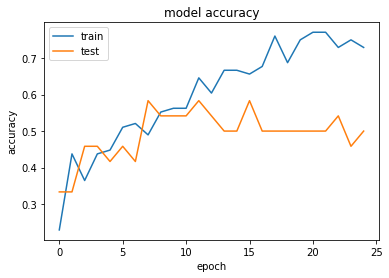

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

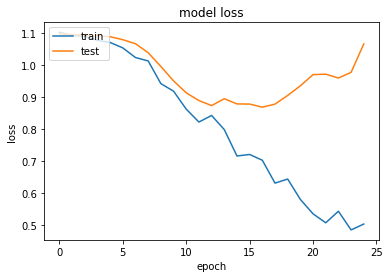

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Saving the model 

In [47]:
model.save("model.h5")